### Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("amazon.xlsx")

In [3]:
df

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...
...,...,...,...,...
5606,4,0,Recommend,Great product for reasonable money. Delivered...
5607,5,0,"Terrible , different colors. I returned",Color is way off and panels do not match
5608,5,0,Extremely pleasing,These are great for my studio as they compleme...
5609,5,0,Perfect,Brought out the beauty in kids room. They love...


In [4]:
df.sort_values(by=["HelpFul"], ascending=False)[:20]

,Star,HelpFul,Title,Review
425,1,124,A great idea poorly executed.,I am so disappointed. I saw the beautiful pic...
58,5,81,Five Stars,"Love them, perfect for my living room"
212,5,74,Used one panel a window,This is the review I would have liked to have ...
252,5,69,Perfect for the bedroom,Although I was hesitant to buy this as it seem...
59,5,60,LOVE!,We constantly get compliments on these as you ...
69,5,57,Bed and Elegant,love love love<br><br>i used these for a back ...
20,4,56,Beautiful !,"beautiful, the curtains really made our living..."
89,5,49,QUALITY you can FEEL!!! :),I took a gamble purchasing these drapes even t...
728,2,48,Easy setup. Cons,Here is my review of the custom beach print cu...
1986,5,46,Great Quality,"They are just Beautiful, I am an outdoor lover..."


In [5]:
df["Title"] = df["Title"].str.lower()
df["Review"] = df["Review"].str.lower()

In [6]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,happy with it
1,5,0,pattern did not align between the two panels.,good quality material however the panels are m...
2,5,0,imagery is stretched. still fun.,product was fun for bedroom windows.<br />imag...
3,5,0,que se ven elegantes muy finas,lo unico que me gustaria es que sean un poco ...
4,5,0,wow great purchase,great bang for the buck i can't believe the qu...


In [7]:
df["Title"] = df["Title"].str.replace("[^\w\s]","")
df["Review"] = df["Review"].str.replace("[^\w\s]","")

In [8]:
df["Review"].head()

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
Name: Review, dtype: object

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
df["Title"] = df["Title"].str.translate(str.maketrans('', '', string.punctuation))
df["Review"] = df["Review"].str.translate(str.maketrans('', '', string.punctuation))

In [11]:
df["Review"].head()

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windowsbr imagery ...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i cant believe the qua...
Name: Review, dtype: object

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
sw = stopwords.words("english")

In [15]:
df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [16]:
df["Title"] = df["Title"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [17]:
df["Title"].head()

0                       looks great
1          pattern align two panels
2       imagery stretched still fun
3    que se ven elegantes muy finas
4                wow great purchase
Name: Title, dtype: object

In [18]:
amountOfWordsReview = pd.Series(" ".join(df["Review"]).split()).value_counts()

In [19]:
r1 = amountOfWordsReview[amountOfWordsReview <= 1]

In [20]:
amountOfWordsTitle = pd.Series(" ".join(df["Title"]).split()).value_counts()

In [21]:
t1 = amountOfWordsTitle[amountOfWordsTitle >= 1]

In [22]:
df["Review"].apply(lambda x : " ".join(x for x in str(x).split() if x not in amountOfWordsReview))
df["Title"].apply(lambda x : " ".join(x for x in str(x).split() if x not in amountOfWordsTitle))

0        
1        
2        
3        
4        
       ..
5606     
5607     
5608     
5609     
5610     
Name: Title, Length: 5611, dtype: object

In [23]:
df["Review"].head()

0                                                happy
1      good quality material however panels mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria es que sean un poco mas ...
4    great bang buck cant believe quality material ...
Name: Review, dtype: object

In [24]:
df["Title"].head()

0                       looks great
1          pattern align two panels
2       imagery stretched still fun
3    que se ven elegantes muy finas
4                wow great purchase
Name: Title, dtype: object

In [25]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from textblob import Word

In [27]:
df["Review"] = df["Review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["Title"] = df["Title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [28]:
df["Title"].head()

0                        look great
1           pattern align two panel
2       imagery stretched still fun
3    que se ven elegantes muy finas
4                wow great purchase
Name: Title, dtype: object

In [29]:
df["Review"].head(20)

0                                                 happy
1        good quality material however panel mismatched
2     product fun bedroom windowsbr imagery bit stre...
3     lo unico que gustaria e que sean un poco ma la...
4     great bang buck cant believe quality material ...
5                                  look different photo
6     exactly looking heavy material great price shi...
7     looking picture thought curtain would thinner ...
8     much whiter thought would wasn’t really expect...
9     curtain picture show 3rd set ambesonne curtain...
10    block view living room front door kitchendinin...
11                       private closed darkening point
12                                    don’t block light
13    work fine night curtain sheer daytime labeled ...
14                                                     
15    love curtain printed polyester type material b...
16                             love hem one smaller one
17    second time writing review amazon always a

In [30]:
barx = amountOfWordsReview[amountOfWordsReview > 500]

In [31]:
barx.index

Index(['curtains', 'love', 'room', 'like', 'beautiful', 'great', 'quality',
       'look', 'nice', 'curtain', 'looks', 'picture', 'material', 'light',
       'good'],
      dtype='object')

In [32]:
barx.values

array([1890, 1311, 1113, 1037,  942,  920,  888,  879,  707,  697,  651,
        640,  561,  552,  535], dtype=int64)

In [33]:
import matplotlib.pyplot as plt

<BarContainer object of 15 artists>

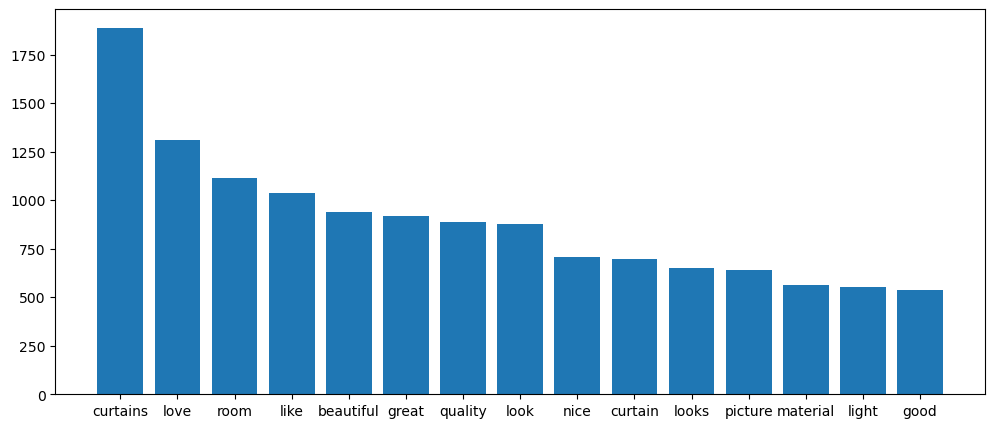

In [34]:
plt.figure(figsize=(12,5))
plt.bar(barx.index,barx.values)

In [35]:
from wordcloud import WordCloud

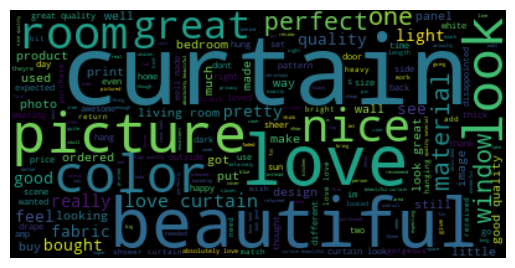

In [36]:
text = " ".join(i for i in df.Review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [38]:
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [40]:
df["polarity_score"].head(5)

0    0.5719
1    0.4404
2    0.7184
3    0.0000
4    0.9042
Name: polarity_score, dtype: float64

In [41]:
df.head()

,Star,HelpFul,Title,Review,polarity_score
0,5,0,look great,happy,0.5719
1,5,0,pattern align two panel,good quality material however panel mismatched,0.4404
2,5,0,imagery stretched still fun,product fun bedroom windowsbr imagery bit stre...,0.7184
3,5,0,que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.0000
4,5,0,wow great purchase,great bang buck cant believe quality material ...,0.9042


In [42]:
df["label"] = df["polarity_score"].apply(lambda x: "pos" if x > 0 else "neg")

In [43]:
df.head()

,Star,HelpFul,Title,Review,polarity_score,label
0,5,0,look great,happy,0.5719,pos
1,5,0,pattern align two panel,good quality material however panel mismatched,0.4404,pos
2,5,0,imagery stretched still fun,product fun bedroom windowsbr imagery bit stre...,0.7184,pos
3,5,0,que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.0000,neg
4,5,0,wow great purchase,great bang buck cant believe quality material ...,0.9042,pos


### Model Training

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["label"])

In [46]:
y = df["sentiment_label"]

In [47]:
X = df["Review"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, shuffle=True, train_size=0.7)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()

# ön tanımlı hali 'word' bazlı
X_tf_idf_word_train = tf_idf_word_vectorizer.fit_transform(X_train)
X_tf_idf_word_test = tf_idf_word_vectorizer.fit_transform(X_test)

In [52]:
X_tf_idf_word_train

<3927x5238 sparse matrix of type '<class 'numpy.float64'>'
	with 44708 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [55]:
log_model = LogisticRegression().fit(X_tf_idf_word_train, y_train)
cross_val_score(log_model,
                X_tf_idf_word_train,
                y_train, scoring='accuracy',
                cv=5).mean()

0.8790444239153337

In [56]:
new_review = pd.Series("disappointing pictured window return closed soon")
new_review = TfidfVectorizer().fit(X_train).transform(new_review)

In [57]:
log_model.predict(new_review)

array([1])

In [58]:
new_review2 = TfidfVectorizer().fit(X_train).transform(X_test)
y_pred = log_model.predict(new_review2)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.26      0.41       248
           1       0.89      1.00      0.94      1436

    accuracy                           0.89      1684
   macro avg       0.91      0.63      0.67      1684
weighted avg       0.89      0.89      0.86      1684



In [61]:
# because of less data for "neg" , We encountered bad f1-score for "neg"

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {'max_depth': [8, None],
             'max_features': [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

rf_best_grid = GridSearchCV(rf_model,
                             rf_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=1).fit(X_tf_idf_word_train, y_train)


rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state= 17).fit(X_tf_idf_word_train, y_train)
cross_val_score(rf_final,
                X_tf_idf_word_train,
                y_train,
                scoring='accuracy',
                cv=5,
                n_jobs=-1).mean()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

0.9011993322636587